### Decision Tree Classification

#### 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("C:/Users/harik/Data science Assignment/heart_disease.xlsx")
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


#### 2. Exploratory Data Analysis (EDA)

In [5]:
df.isnull().sum()

age             0
Age in years    0
dtype: int64

In [6]:
df.fillna(method='ffill', inplace=True)

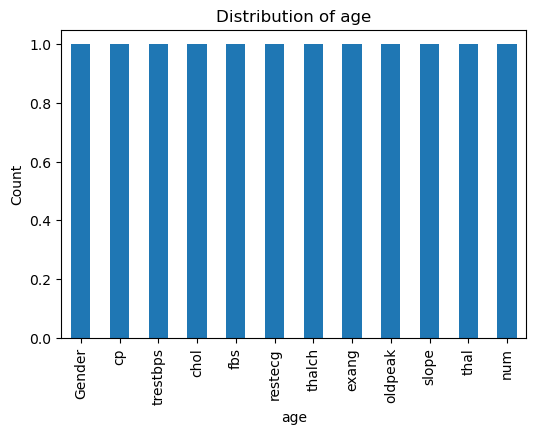

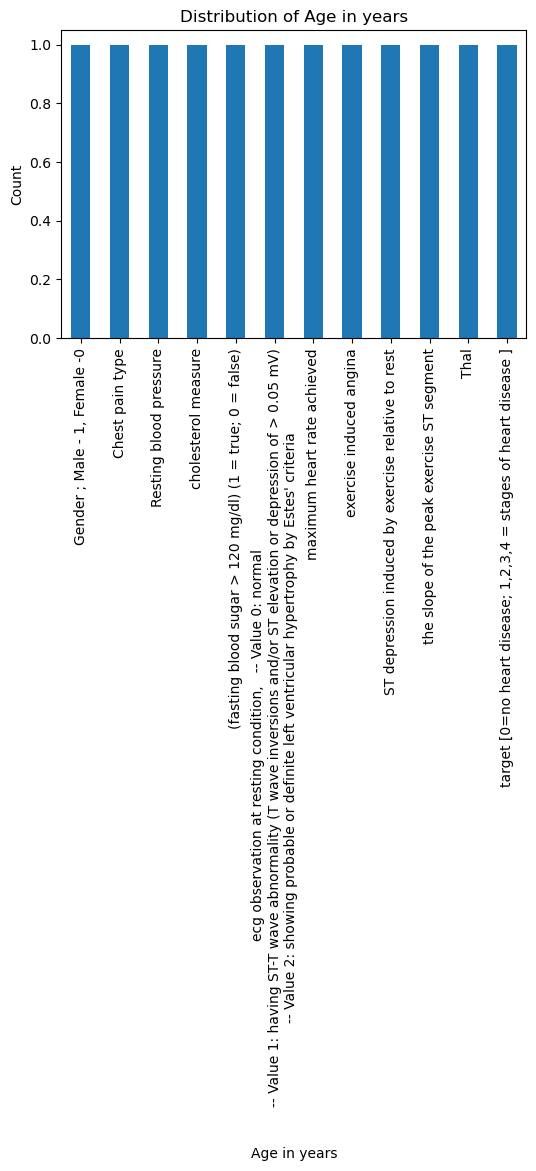

In [7]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#### 3. Feature Engineering

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_encoded = X.apply(le.fit_transform)
y_encoded = le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42
)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.head())
print(y.head())

   age
0    0
1    2
2   11
3    1
4    4
0    2
1    1
2    3
3    6
4    0
Name: Age in years, dtype: int32


#### 4. Decision Tree Classification

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
y_pred = model.predict(X_test)

#### 5. Hyperparameter Tuning

In [16]:
best_model = DecisionTreeClassifier(
    max_depth=5,
    criterion='entropy',
    random_state=42
)

best_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [17]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Classification Report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


Confusion Matrix:

[[0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


#### 6.Model Evaluation and Analysis

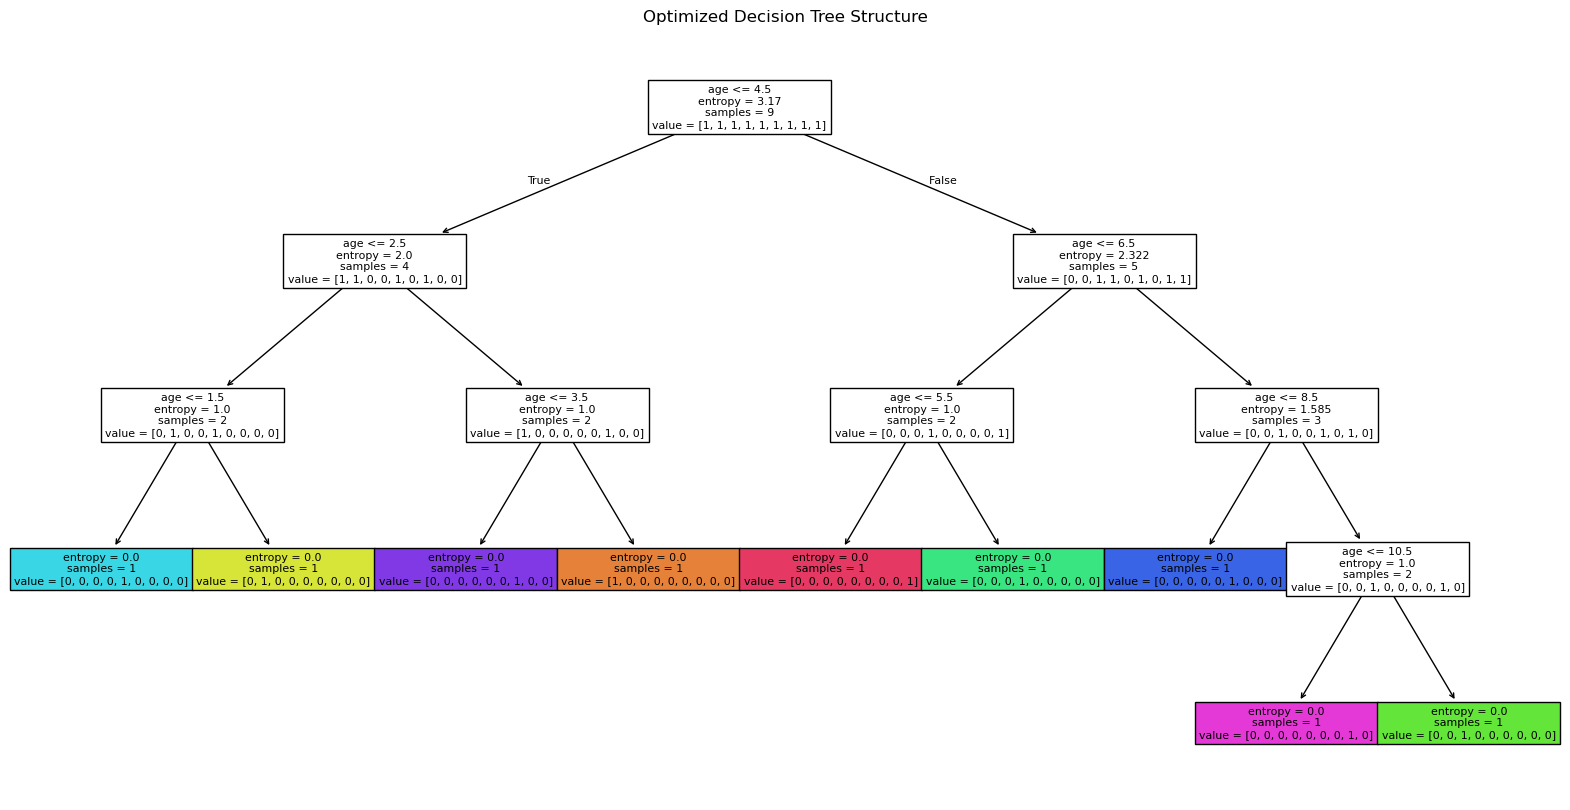

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    filled=True
)
plt.title("Optimized Decision Tree Structure")
plt.show()

In [19]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
0,age,1.0
